In [121]:
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Download dataset

In [122]:
DATASET_PATH = '../data/'
DATASET_FILENAME = DATASET_PATH + 'fish.zip'

raw_dataset = pd.read_csv(DATASET_FILENAME)

# Data Cleaning

In [123]:
raw_dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [124]:
raw_dataset.shape

(159, 7)

In [125]:
raw_dataset.columns = raw_dataset.columns.str.lower().str.replace(' ','_')

In [126]:
raw_dataset.columns

Index(['species', 'weight', 'length1', 'length2', 'length3', 'height',
       'width'],
      dtype='object')

In [127]:
raw_dataset.isnull().sum()

species    0
weight     0
length1    0
length2    0
length3    0
height     0
width      0
dtype: int64

# EDA
- [x] Check features  
- [x] Select feature types and target
  [x] Categorical: display count values ("histogram"), check mutual_info_score
- [x] Numerical: Numerical: check distributions, correlations, skewness and outliers


In [128]:
# Check features
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  159 non-null    object 
 1   weight   159 non-null    float64
 2   length1  159 non-null    float64
 3   length2  159 non-null    float64
 4   length3  159 non-null    float64
 5   height   159 non-null    float64
 6   width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


This dataset is very usable. There are no nulls/NaNs and the inferred types by read_csv are correct. Categorical feature 'species' and the rest of the features are numerical. Select 'weight' as target for predictions

In [129]:
categorical = list(raw_dataset.dtypes.index[(raw_dataset.dtypes == 'object') | (raw_dataset.dtypes == 'str')])
numerical = list(raw_dataset.dtypes.index[(raw_dataset.dtypes != 'object') & (raw_dataset.dtypes != 'str')])

In [130]:
target = 'weight'
numerical.remove(target)

## Target

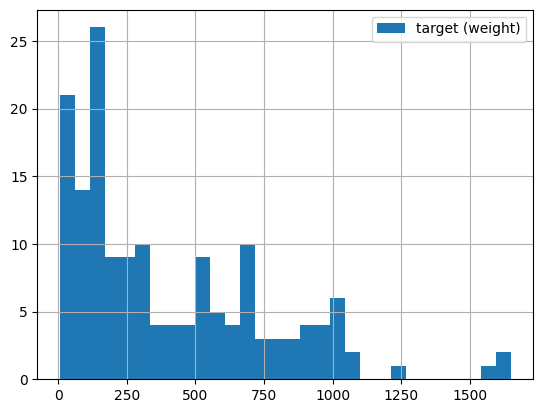

In [303]:
raw_dataset[target].hist(bins=30, label="target (weight)")
plt.legend()

This is not a long tail situation. Could be having outliers, let's check later on.

## Categorical

In [131]:
raw_dataset.describe(include=['object'])

,species
count,159
unique,7
top,Perch
freq,56


,perch,bream,roach,pike,smelt,parkki,whitefish
species,56,35,20,17,14,11,6


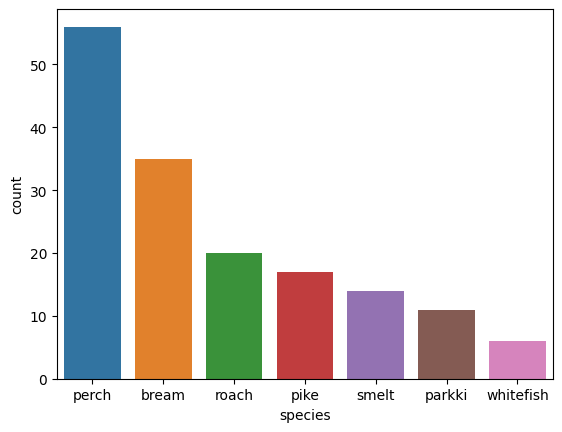

In [132]:
for category in categorical:
  raw_dataset[category] = raw_dataset[category].str.lower()
  value_counts = pd.DataFrame(raw_dataset[category].value_counts())
  display(value_counts.T)
  sns.countplot(x=raw_dataset[category], order=value_counts.index)

In [133]:
categorical

['species']

Correlation between categorical variables and numerical variables (target or any other feature) may be calculated by alternative methods.
https://stats.stackexchange.com/questions/29489/how-do-i-study-the-correlation-between-a-continuous-variable-and-a-categorical
Discretize continuous into numerical categories or just categories. Mutual info score also works with numerical categories.

Let's create a discretized target from the weight target variable. We use qcut, that cuts the variable into n different intervals using quantiles, that is, if q=10, each interval has 10% of the samples. So the actual intervals differ in size (cut is used for intervals of the same size)

In [321]:
q_weight = pd.qcut(raw_dataset[target], q=10)
q_weight.value_counts(sort=False)

(5.899, 37.6]      16
(37.6, 110.0]      18
(110.0, 145.0]     17
(145.0, 186.4]     12
(186.4, 281.5]     16
(281.5, 398.0]     16
(398.0, 554.4]     15
(554.4, 700.0]     18
(700.0, 932.5]     14
(932.5, 1650.0]    16
Name: weight, dtype: int64

In [324]:
from sklearn.metrics import mutual_info_score
mutual_info_score(q_weight, raw_dataset["species"])

0.6567961121914098

There is nothing to compare with. 

## Numerical

In [135]:
raw_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


Delete samples with weight = 0

In [136]:
raw_dataset[raw_dataset['weight'] < 1]

,species,weight,length1,length2,length3,height,width
40,roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [137]:
raw_dataset.drop(raw_dataset[raw_dataset['weight'] < 1].index, axis=0, inplace=True)

## Histogram of numerical variables

C:\Users\MARCOS\AppData\Local\Temp\ipykernel_7232\2083701009.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  raw_dataset[numerical].hist(bins=50, ax=ax, layout=(3,3))


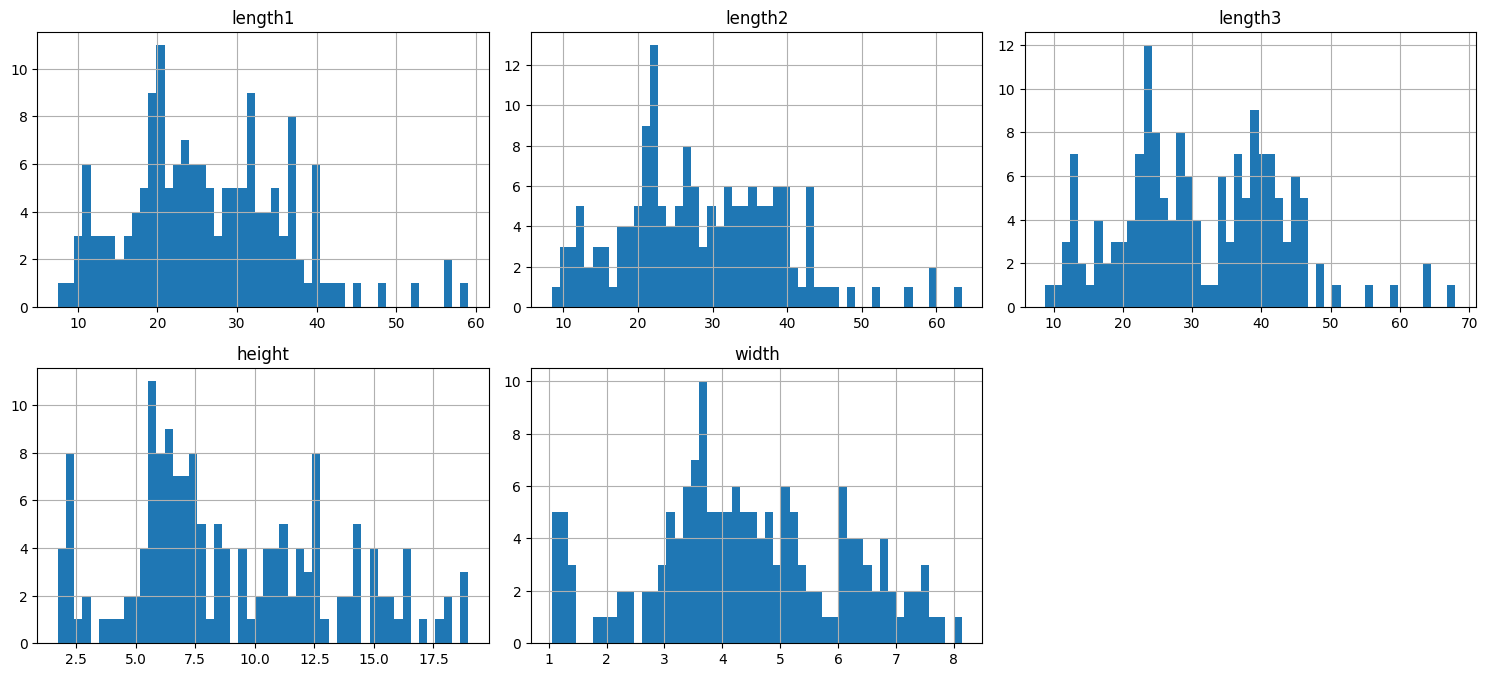

In [138]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
raw_dataset[numerical].hist(bins=50, ax=ax, layout=(3,3))
plt.tight_layout()
plt.show()

Check skew, a numerical formulation of what we see in the histograms.  
When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.  
When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.  
When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.  
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical  
If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed  
If the skewness is less than -1 or greater than 1, the data are highly skewed  

In [139]:
raw_dataset[numerical].skew()

length1    0.578149
length2    0.529417
length3    0.380822
height     0.387337
width     -0.005539
dtype: float64

## Check outliers

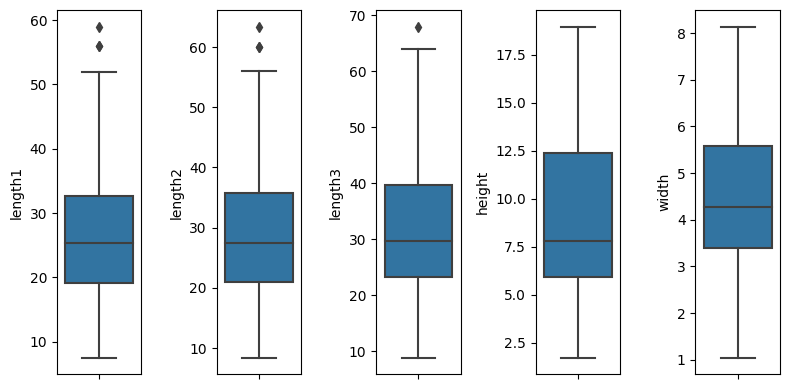

In [140]:
f, axes = plt.subplots(1,5, figsize=(8, 4))

for name, ax in zip(numerical, axes.flatten()):
  sns.boxplot(y=raw_dataset[name], data=raw_dataset, ax = ax)
  
plt.tight_layout()

## Check correlation

<AxesSubplot: >

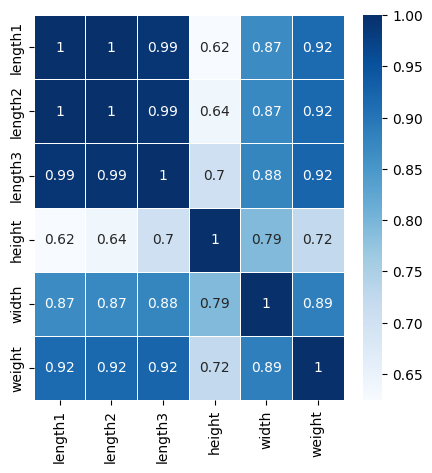

In [141]:
plt.figure(figsize=(5,5))
sns.heatmap(raw_dataset[numerical+[target]].corr(), annot=True, cmap='Blues', linewidths=0.5)

lenghts 1 to 3 are extremely correlated. And any of the numerical features is correlated with weight (target). It is reasonable, since the larger the fish dimensions, the bigger the weight. We could check this on a fish (category) basis, calculate the correlation for each category of fishes

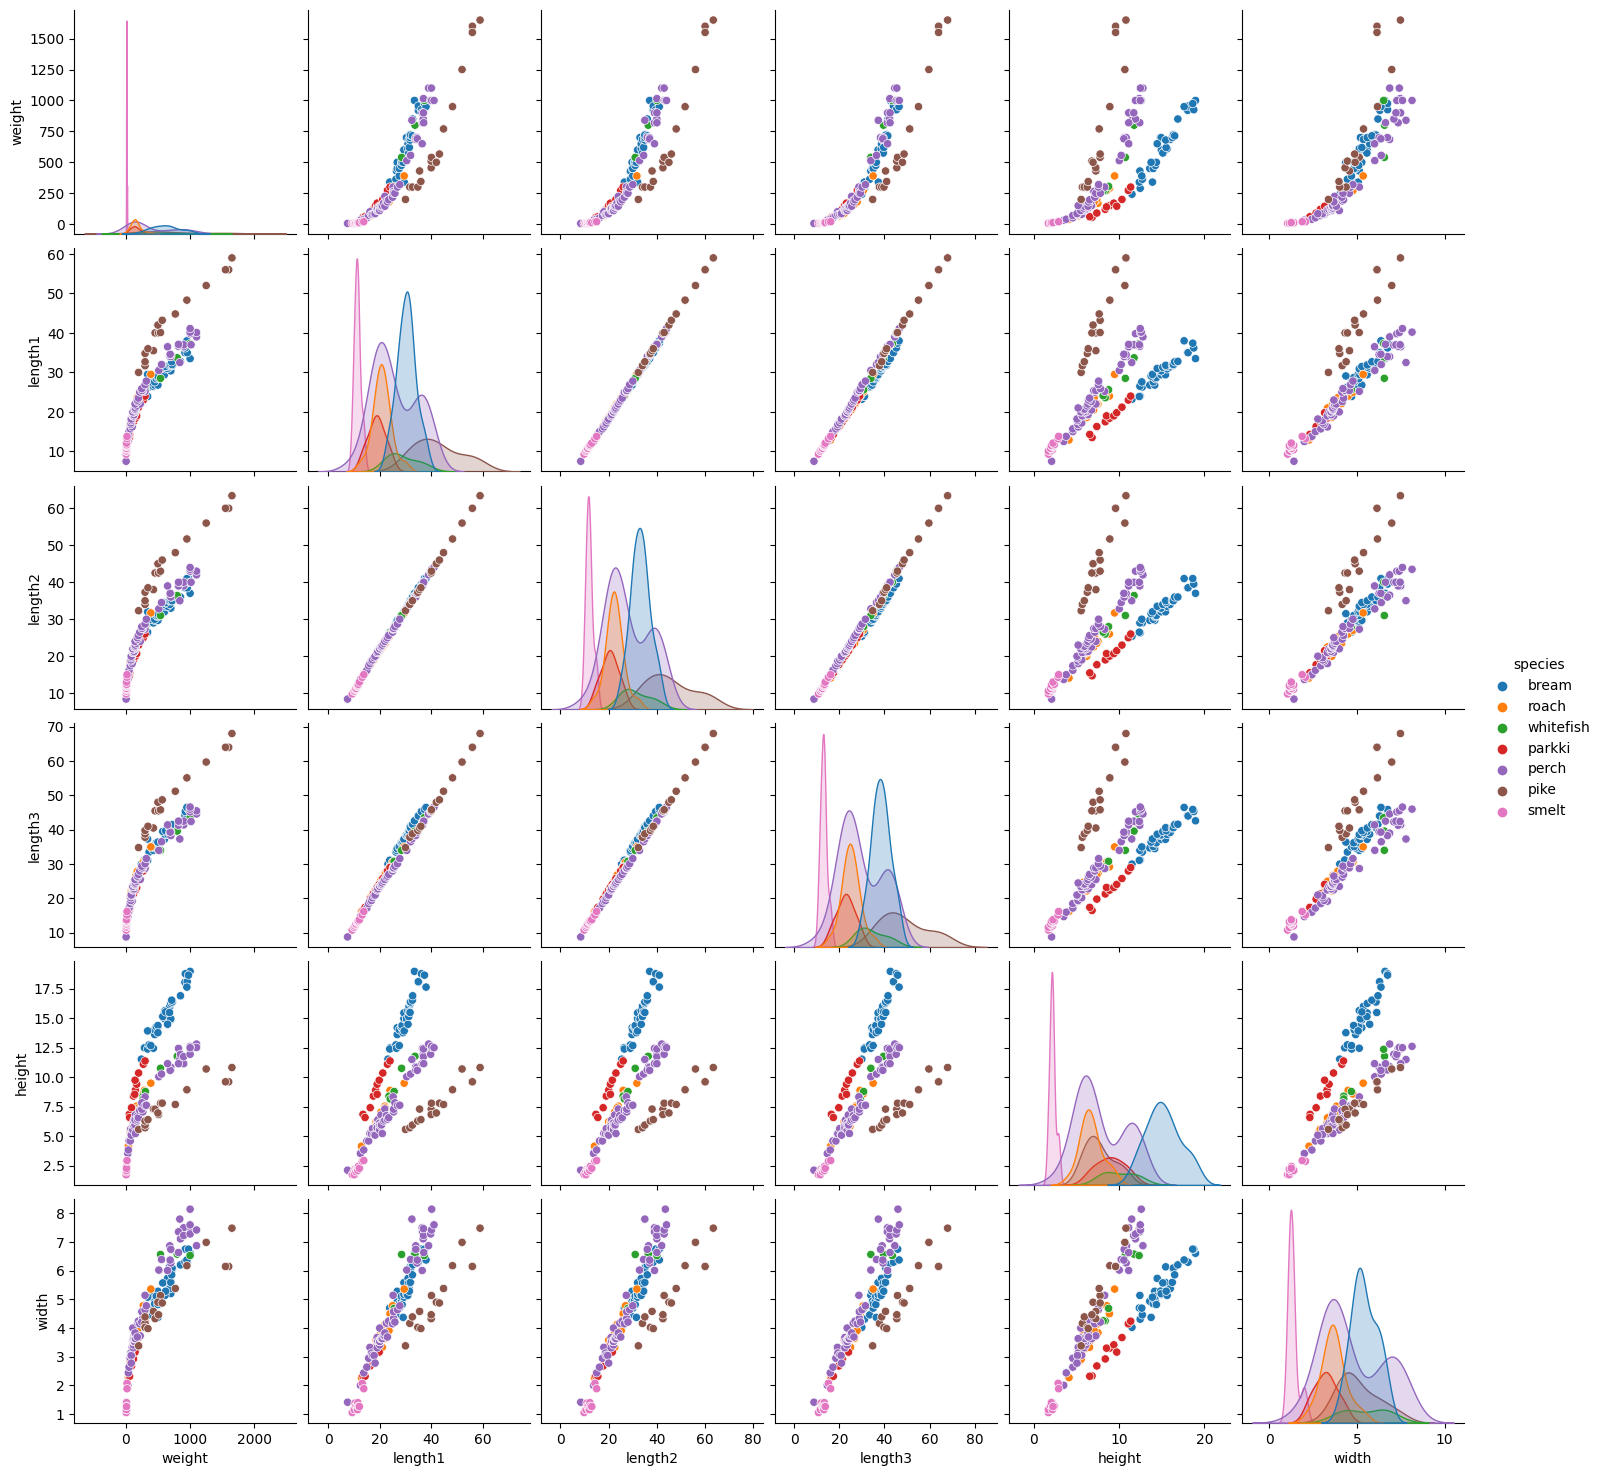

In [142]:
g = sns.pairplot(raw_dataset, kind='scatter', hue='species')

Correlation of lengths persists in all species.
The distribution is different for each specie, however these are gaussian-like except for the perch (standardization should manage this). No no long tails.

Initially, we will keep all the features

# Select strategy

1. Start with LinearRegressor
   1. Use stratify to keep species distribution in train and val/test sets
   2. Start without managing outliers, and use all three correlated dimensions.
   3. Manage outliers
   4. Check with only one of the correlated dimensions.  
   5. Check val with cross-validation since the dataset is small.
2. Continue with Lasso and Ridge
   1. Select best alpha with cross-validation
3. Continue with decision Tree
   1. Use cross validation together with several values of max_depth and min_sample_leaf
4. Continue with Random Forest
   1. Use cross validation with several values of max_depth, min_sample_leaf and num_estimators
5. Conclude with XGBoost
   1. Use cross validation with several values of the most important parameters
6. Select the best model. Retrain with the fulltrain dataset. Test with test dataset

# Select evaluation metrics

rmse will be used for this correlation problem

In [143]:
from sklearn.metrics import mean_squared_error

# Create train-val-test datasets

In [144]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split


In [145]:
df_full_train, df_test = train_test_split(raw_dataset, test_size=0.2, random_state=5, stratify=raw_dataset[categorical])
df_train, df_val = train_test_split(raw_dataset, test_size=0.25, random_state=5, stratify=raw_dataset[categorical])

In [146]:

y_full_train = df_full_train[target].values
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [147]:
del df_full_train[target]
del df_train[target]
del df_val[target]
del df_test[target]

# Prepare Features
Define pipeline

In [148]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

In [149]:
class ToDictTransformer(TransformerMixin, BaseEstimator):

  def __init__(self):
    self.columns = None

  def fit(self, df, y=None):
    return self

  def transform(self, df):
    return df.to_dict(orient='records')

  def get_feature_names_out(self, *args, **kwargs):
    return self.columns

In [150]:
categorical_pipeline = make_pipeline(ToDictTransformer(), DictVectorizer())

In [151]:
preprocessor = ColumnTransformer([
  ('categorical', categorical_pipeline, categorical),
  ('numerical', StandardScaler(), numerical)
])

# Train Linear Regressions

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))

In [154]:
train_pipeline.fit(df_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('todicttransformer',
                                                                   ToDictTransformer()),
                                                                  ('dictvectorizer',
                                                                   DictVectorizer())]),
                                                  ['species']),
                                                 ('numerical', StandardScaler(),
                                                  ['length1', 'length2',
                                                   'length3', 'height',
                                                   'width'])])),
                ('linearregression', LinearRegression())])

Check prediction on train dataset

In [155]:
y_pred_train = train_pipeline.predict(df_train)

Visualize results

In [156]:

results_train = pd.DataFrame({ 
  'y_pred_train': y_pred_train,
  'y_train': y_train,
  'error_train': y_pred_train-y_train,
  'error_train(%)': (y_pred_train-y_train) / y_train
})

y_pred_val = train_pipeline.predict(df_val)
results_val = pd.DataFrame({ 
  'y_pred_val': y_pred_val,
  'y_val': y_val,
  'error_val': y_pred_val-y_val,
  'error_val(%)': (y_pred_val-y_val) / y_val
})

Text(0, 0.5, 'error(%)')

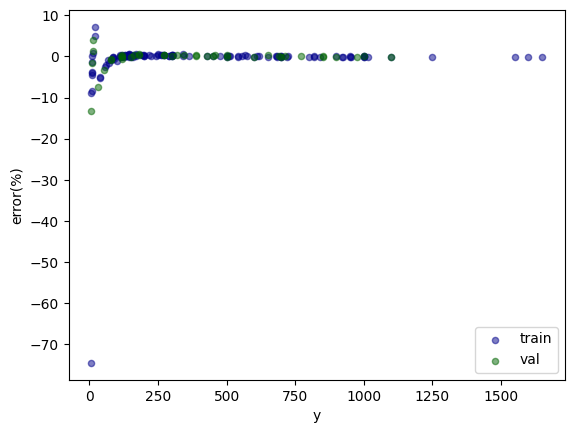

In [157]:
ax = results_train.plot(y='error_train(%)', x='y_train', kind='scatter', color='DarkBlue', label='train', alpha = 0.5)
results_val.plot(y='error_val(%)', x='y_val', kind='scatter', ax=ax, color='DarkGreen', label='val', alpha = 0.5)
plt.xlabel('y')
plt.ylabel('error(%)')

In [158]:
# Outlier?
results_train.iloc[y_train.argmin()]

y_pred_train     -433.658728
y_train             5.900000
error_train      -439.558728
error_train(%)    -74.501479
Name: 67, dtype: float64

Relative error (to the actual weight) y higher at low weights. High bias on this segment

In [159]:
rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
rmse_val = mean_squared_error(y_pred_val, y_val, squared=False)
print(f'rmse_train={rmse_train:.02f}, rmse_val={rmse_val:0.2f}')

rmse_train=89.83, rmse_val=96.28


In [199]:
results = pd.DataFrame({'train_lin_reg': [rmse_train], 'val_lin_reg': [rmse_val]}, index=['rmse'])
results.T


,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031


Analyse the effect of stratify and random state:

Running several times the train with stratify and different random state cause that sometimes, the val rmse is lower than the train rmse. This means that by chance, the validation dataset is fitted better then the trainning dataset. This seems that it not happening when stratify is not used.
The reason is that the dataset is pretty small. Note that not using stratify may lead to a val dataset that may have a missed class

Remove outliers (according to box plot) and compare results

In [161]:
def remove_outliers(df, columns):
  df = df.copy()
  for column in columns:
    serie = df[column]
    q1 =  serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower_value = q1 - 1.5 * iqr
    higher_value = q3 + 1.5 * iqr
    to_remove = df[(serie < lower_value) | (serie > higher_value)].index
    if len(to_remove) > 0:
      print('Removing outliers')
      print(to_remove)
    df.drop(to_remove, inplace=True)
  return df

In [162]:
dataset_no_outliers = remove_outliers(raw_dataset, numerical)

Removing outliers
Int64Index([142, 143, 144], dtype='int64')


In [163]:
df_train.shape

(118, 6)

In [200]:
df_full_train, df_test = train_test_split(dataset_no_outliers, test_size=0.2, random_state=5,stratify=dataset_no_outliers[categorical])
df_train, df_val = train_test_split(dataset_no_outliers, test_size=0.25, random_state=5,stratify=dataset_no_outliers[categorical])
y_full_train = df_full_train[target].values
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values
del df_full_train[target]
del df_train[target]
del df_val[target]
del df_test[target]
train_pipeline.fit(df_train, y_train)
y_pred_train = train_pipeline.predict(df_train)
y_pred_val = train_pipeline.predict(df_val)
rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
rmse_val = mean_squared_error(y_pred_val, y_val, squared=False)
print(f'rmse_train_no_outliers={rmse_train:.02f}, rmse_val_no_outliers={rmse_val:0.2f}')
results['train_lin_reg_no_outliers'] = [rmse_train]
results['val_lin_reg_no_outliers'] = [rmse_val]
results.T


rmse_train_no_outliers=75.73, rmse_val_no_outliers=72.59


,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031


Important improvement in fitting trainning data and validation data when the outliers are discarded. This is true when previously, any of train or val datasets had utliers. This depends on the random_state used.

Eliminate colinear features. Discard length2 and length3
Note that the ColumnTransformer will drop (remainder='drop' by default) any column not included in the list

In [201]:
simplified_numerical = [e for e in numerical if e not in ['length2', 'length3']]

preprocessor = ColumnTransformer([
  ('categorical', categorical_pipeline, categorical),
  ('numerical', StandardScaler(), simplified_numerical)
], remainder='drop')
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))
train_pipeline.fit(df_train, y_train)
y_pred_train = train_pipeline.predict(df_train)
y_pred_val = train_pipeline.predict(df_val)
rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
rmse_val = mean_squared_error(y_pred_val, y_val, squared=False)
print(f'rmse_train_no_outliers_simple={rmse_train:.02f}, rmse_val_no_outliers_simple={rmse_val:0.2f}')
results['train_lin_reg_no_outliers_simple'] = [rmse_train]
results['val_lin_reg_no_outliers_simple'] = [rmse_val]
results.T


rmse_train_no_outliers_simple=75.73, rmse_val_no_outliers_simple=72.59


,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031


This simple model has a similar performance

**Let's continue with: stratify - no outliers - simple.**  
Note that decision trees are not affected (in general) by colinearity and tree based algorithms do not require normalization/standarization

Use cross validation to check the distribution of the performance in the validation data. Also because of the limited size of the dataset.

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
train_pipeline = make_pipeline(preprocessor, LinearRegression(fit_intercept=True))

In [203]:
# Keep cv=5 equals 20% for validation. ~25 samples for validation.
# Trainning samples are already shuffled.
# neg_root_mean_squared_error is just the negative of mean_squared_error. So the larger the better.
scores = cross_val_score(train_pipeline, df_full_train, y_full_train, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
cross_val_lin_reg = np.abs(scores.mean())
print(f'mean(-rmse)={cross_val_lin_reg} std(-rmse)={scores.std()}')
results["cross_val_lin_reg"] = cross_val_lin_reg
results.T

[ -69.28544602 -109.08098258  -97.53202788  -57.48298329  -54.36173534]
mean(-rmse)=77.54863501982388 std(-rmse)=21.91879522951005


,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031
cross_val_lin_reg,77.548635


Test with Lasso and Ridge estimators  
Lasso Linear Model trained with L1 prior as regularizer (aka the Lasso): Cost function (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1 -> hyperparameter alpha  
Rige: ||y - Xw||^2_2 + alpha * ||w||^2_2 -> hyperparameter alpha  

In [171]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [209]:
alphas = [5, 4, 3, 2, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.01, 0.001, 0.0005]
scores_lasso = []
scores_ridge = []
for alpha in alphas:
  train_pipeline = make_pipeline(preprocessor, Lasso(fit_intercept=True, alpha=alpha, max_iter=100000))
  scores = cross_val_score(train_pipeline, df_full_train, y_full_train, cv=5, scoring='neg_root_mean_squared_error')
  scores_lasso.append((alpha,scores.mean()))
  print(f'Lasso alpha={alpha} mean(-rmse)={scores.mean()} std(-rmse)={scores.std()}')
  train_pipeline = make_pipeline(preprocessor, Ridge(fit_intercept=True, alpha=alpha, max_iter=100000))
  scores = cross_val_score(train_pipeline, df_full_train, y_full_train, cv=5, scoring='neg_root_mean_squared_error')
  scores_ridge.append((alpha, scores.mean()))
  print(f'Ridge alpha={alpha} mean(-rmse)={scores.mean()} std(-rmse)={scores.std()}')


Lasso alpha=5 mean(-rmse)=-82.43824982003244 std(-rmse)=19.13814334011556
Ridge alpha=5 mean(-rmse)=-84.98439712201761 std(-rmse)=17.88008301703969
Lasso alpha=4 mean(-rmse)=-80.75223297815546 std(-rmse)=19.68416861631721
Ridge alpha=4 mean(-rmse)=-83.2734529157783 std(-rmse)=18.37355570831948
Lasso alpha=3 mean(-rmse)=-79.41469746225297 std(-rmse)=20.257726357156834
Ridge alpha=3 mean(-rmse)=-81.3707854801506 std(-rmse)=19.00339068591796
Lasso alpha=2 mean(-rmse)=-78.22023494983698 std(-rmse)=20.946789864135802
Ridge alpha=2 mean(-rmse)=-79.29721602233437 std(-rmse)=19.82540300212436
Lasso alpha=1 mean(-rmse)=-76.65399646325358 std(-rmse)=22.125307614650943
Ridge alpha=1 mean(-rmse)=-77.24341627823242 std(-rmse)=20.927056224325717
Lasso alpha=0.5 mean(-rmse)=-76.38231815376605 std(-rmse)=22.16918269131651
Ridge alpha=0.5 mean(-rmse)=-76.53472626096888 std(-rmse)=21.603833104753416
Lasso alpha=0.3 mean(-rmse)=-76.58889123605734 std(-rmse)=22.262941925193815
Ridge alpha=0.3 mean(-rmse)=

In [210]:
results_lasso = pd.DataFrame(scores_lasso, columns=['alpha','nrmse']).sort_values('nrmse', ascending=False)
best_lasso = results_lasso.iloc[0]
results["cross_val_best_lasso"] = np.abs(best_lasso.nrmse)
results.T

,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031
cross_val_lin_reg,77.548635
cross_val_best_lasso,76.382318
cross_val_best_ridge,76.499108


In [211]:
results_ridge = pd.DataFrame(scores_ridge, columns=['alpha','nrmse']).sort_values('nrmse', ascending=False)
best_ridge = results_ridge.iloc[0]
results["cross_val_best_ridge"] = np.abs(best_ridge.nrmse)
results.T

,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031
cross_val_lin_reg,77.548635
cross_val_best_lasso,76.382318
cross_val_best_ridge,76.499108


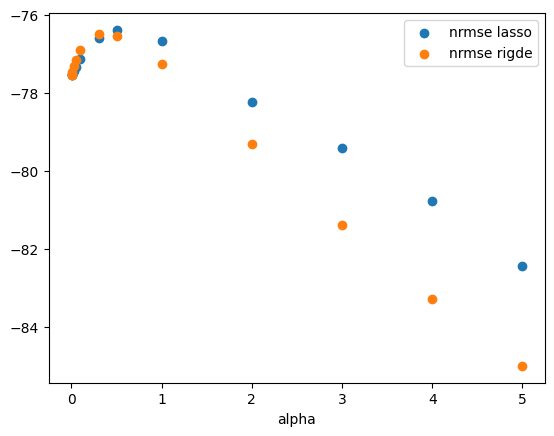

In [212]:
plt.scatter(results_lasso["alpha"], results_lasso["nrmse"], label='nrmse lasso')
plt.scatter(results_ridge["alpha"], results_ridge["nrmse"], label='nrmse rigde')
plt.xlabel('alpha')
plt.legend()

Large alpha will make coefficients smaller (not the interceptor). This means more bias and less variance. Until a point where too much regularization will cause the bias to increase, since the coefficients will become pretty small, which means a less complex model unnable to any of the trainning dataset or validation dataset.
Introduction to Statistical Learning:  
"As λ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias."  

In [213]:
# LassoCV will perform for each alpha, a crossvalidation (by default 5 folds)
# LassoCV will be refitted on the full training dataset after finding the best combination of hyper-parameters.
# R2 score is used. To use an alternative, use GridSearchCV with the corresponding estimator and score.
train_pipeline = make_pipeline(preprocessor, LassoCV(fit_intercept=True, alphas=alphas, max_iter=100000))
train_pipeline.fit(df_full_train, y_full_train)
print(f'LassoCV alpha: { train_pipeline.named_steps["lassocv"].alpha_ }')

train_pipeline = make_pipeline(preprocessor, RidgeCV(fit_intercept=True, alphas=alphas))
train_pipeline.fit(df_full_train, y_full_train)
print(f'RidgeCV alpha: { train_pipeline.named_steps["ridgecv"].alpha_ }')


LassoCV alpha: 0.5
RidgeCV alpha: 0.3


Conclusion:  
Small values of the target have more relative error.
The small size of the dataset may lead to a validation rmse lower than the trainning rmse. Specially when using stratifty in the train_test_split to keep the distribution of the 'species' class across train and validation datasets. Cross-validation is used to mitigate this effect.
The small size of the dataset causes that the rmse may vary depending on how the data is shuffled (train_test_split and k-fold subset), as shown in the cross validation (std deviation).
There is no important improvement in using Lasso or Ridge over standard linear regression.
Dataset stratified, without outliers and without length2 and length3 features is used.
Lasso with alpha=0.3 is the best choice.

# Train decision Tree Regressor

In [214]:
from sklearn.model_selection import GridSearchCV

In [230]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=5)
train_pipeline = make_pipeline(preprocessor, tree)
train_pipeline.fit(df_train, y_train)
y_pred_train = train_pipeline.predict(df_train)
y_pred_val = train_pipeline.predict(df_val)
rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
rmse_val = mean_squared_error(y_pred_val, y_val, squared=False)
print(f'rmse_train_no_outliers_simple={rmse_train:.02f}, rmse_val_no_outliers_simple={rmse_val:0.2f}')

rmse_train_no_outliers_simple=0.00, rmse_val_no_outliers_simple=88.55


Obviously, overfit by default, since (at least) max_depth and min_sample_leafs are not set. Let's use GridSearchCV to find the best values for these two params
GridSearchCV will, by default, refit on the full train dataset, with the best params

In [231]:
train_pipeline = make_pipeline(preprocessor, tree)
train_pipeline.fit(df_train, y_train)
train_pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('todicttransformer',
                                                   ToDictTransformer()),
                                                  ('dictvectorizer',
                                                   DictVectorizer())]),
                                  ['species']),
                                 ('numerical', StandardScaler(),
                                  ['length1', 'height', 'width'])]),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=5)}

In [232]:
train_pipeline = make_pipeline(preprocessor, tree)
dc_params = [{
  'decisiontreeregressor__max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'decisiontreeregressor__min_samples_leaf' : [1, 5, 10, 20, 30]
}]
gs_decision_tree = GridSearchCV(train_pipeline, param_grid=dc_params, cv=5, scoring='neg_root_mean_squared_error')
gs_decision_tree.fit(df_full_train, y_full_train)
gs_decision_tree.best_params_


{'decisiontreeregressor__max_depth': 10,
 'decisiontreeregressor__min_samples_leaf': 1}

In [233]:
gs_decision_tree.cv_results_["mean_test_score"]

array([-160.99228872, -160.99228872, -160.99228872, -160.99228872,
       -160.99228872, -102.35587588, -102.35587588, -102.35587588,
       -133.26641617, -135.93823133,  -91.24654611,  -92.88704171,
        -98.85157584, -128.21141902, -135.93823133,  -80.84169859,
        -80.1444644 ,  -97.17915335, -128.21141902, -135.93823133,
        -75.0656722 ,  -79.59802125,  -97.17915335, -128.21141902,
       -135.93823133,  -77.57421436,  -79.56655749,  -97.17915335,
       -128.21141902, -135.93823133,  -80.90258311,  -79.56655749,
        -97.17915335, -128.21141902, -135.93823133,  -83.88852038,
        -79.56655749,  -97.17915335, -128.21141902, -135.93823133,
        -77.38079553,  -79.56655749,  -97.17915335, -128.21141902,
       -135.93823133,  -73.35432324,  -79.56655749,  -97.17915335,
       -128.21141902, -135.93823133])

In [236]:
cross_val_decision_tree = np.abs(gs_decision_tree.score(df_val, y_val))
results["cross_val_decision_tree"] = cross_val_decision_tree
results.T

,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031
cross_val_lin_reg,77.548635
cross_val_best_lasso,76.382318
cross_val_best_ridge,76.499108
cross_val_decission_tree,74.298544


Slight improvement with the decision Tree

# Train Random Forest Regressor

In [244]:
from sklearn.ensemble import RandomForestRegressor

Most important params are:

n_estimators: int, default=100 The number of trees in the forest.

max_features: {“sqrt”, “log2”, None}, int or float, default=”sqrt”. The number of features to consider when looking for the best split

bootstrap: bool, default=True. Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

oob_score: bool, default=False. Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

max_samples: int or float, default=Non. If bootstrap is True, the number of samples to draw (se extraerán) from X to train each base estimator. If None (default), then draw X.shape[0] samples. 


In [245]:
random_forest_ = RandomForestRegressor(random_state=5)
train_pipeline = make_pipeline(preprocessor, random_forest_)
train_pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('categorical',
                                  Pipeline(steps=[('todicttransformer',
                                                   ToDictTransformer()),
                                                  ('dictvectorizer',
                                                   DictVectorizer())]),
                                  ['species']),
                                 ('numerical', StandardScaler(),
                                  ['length1', 'height', 'width'])]),
 'randomforestregressor': RandomForestRegressor(random_state=5)}

In [246]:
rf_params = [{
  'randomforestregressor__max_depth' : [ 4, 5, 6, 7, 8, 9, 10],
  'randomforestregressor__min_samples_leaf' : [1, 5],
  'randomforestregressor__n_estimators': [80, 90, 100, 110, 120]
}]

In [247]:
gs_random_forest = GridSearchCV(estimator=train_pipeline, param_grid=rf_params, cv=5, scoring="neg_root_mean_squared_error", verbose=True)
gs_random_forest.fit(df_full_train, y_full_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('todicttransformer',
                                                                                          ToDictTransformer()),
                                                                                         ('dictvectorizer',
                                                                                          DictVectorizer())]),
                                                                         ['species']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['length1',
                                                                          'height',
                                                                          'width'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=5))]),
             param_grid=[{'randomforestregressor__max_depth': [4, 5, 6, 7, 8, 9,
                                                               10],
                          'randomforestregressor__min_samples_leaf': [1, 5],
                          'randomforestregressor__n_estimators': [80, 90, 100,
                                                                  110, 120]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [248]:
val_best_random_forest = gs_random_forest.score(df_val, y_val)
print(f'val_best_random_forest = {val_best_random_forest}')
print(gs_random_forest.best_params_)
results["val_best_random_forest"] = np.abs(val_best_random_forest)
results.T

val_best_random_forest = -57.18232371853975
{'randomforestregressor__max_depth': 6, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__n_estimators': 80}


,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031
cross_val_lin_reg,77.548635
cross_val_best_lasso,76.382318
cross_val_best_ridge,76.499108
cross_val_decission_tree,74.298544


Important improvement with the RandomForestRegressor, as it would be advisable

# Train XGBoost Regressor

In [256]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [286]:
xgb_params = [{
  'xgbregressor__n_estimators': [50, 80,100,120],
  'xgbregressor__max_depth': [2,3,4,5,6],
  'xgbregressor__eta' : [1,0.5,0.3,0.1, 0.01,0.001],
  'xgbregressor__min_child_weight' : [1,5,10],
}]

In [287]:
xgb_regressor = XGBRegressor(random_state=5, n_jobs=4)
train_pipeline = make_pipeline(preprocessor, xgb_regressor)
gs_xgboost = GridSearchCV(estimator=train_pipeline, param_grid=xgb_params, scoring="neg_root_mean_squared_error", verbose=True)

In [288]:
gs_xgboost.fit(df_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('todicttransformer',
                                                                                          ToDictTransformer()),
                                                                                         ('dictvectorizer',
                                                                                          DictVectorizer())]),
                                                                         ['species']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['length1',
                                                                          'height',
                                                                          'width'])])),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=Non...
                                                     monotone_constraints=None,
                                                     n_estimators=100, n_jobs=4,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=5, ...))]),
             param_grid=[{'xgbregressor__eta': [1, 0.5, 0.3, 0.1, 0.01, 0.001],
                          'xgbregressor__max_depth': [2, 3, 4, 5, 6],
                          'xgbregressor__min_child_weight': [1, 5, 10],
                          'xgbregressor__n_estimators': [50, 80, 100, 120]}],
             scoring='neg_root_mean_squared_error', verbose=True)

In [289]:
gs_xgboost.best_params_

{'xgbregressor__eta': 0.1,
 'xgbregressor__max_depth': 5,
 'xgbregressor__min_child_weight': 1,
 'xgbregressor__n_estimators': 80}

In [292]:
val_best_xgboost = gs_xgboost.score(df_val, y_val)
print(f'cross_val_best_xgboost = {val_best_xgboost}')
print(gs_xgboost.best_params_)
results["cross_val_best_xgboost"] = np.abs(val_best_xgboost)
results.T

cross_val_best_xgboost = -44.14828710430643
{'xgbregressor__eta': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 80}


,rmse
train_lin_reg,75.725591
val_lin_reg,72.593031
train_lin_reg_no_outliers,75.725591
val_lin_reg_no_outliers,72.593031
train_lin_reg_no_outliers_simple,75.725591
val_lin_reg_no_outliers_simple,72.593031
cross_val_lin_reg,77.548635
cross_val_best_lasso,76.382318
cross_val_best_ridge,76.499108
cross_val_decission_tree,74.298544


Xgboost is the best model